# Arbitrary molecular labels

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import chilife as xl
plt.style.use('chiLife')

C:\Program Files\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In some cases, investigators may be interested in labeling not just proteins and nucleic acids, but arbitrary molecules like ligands, or lipids. In this example, we create a rotamer library for labeling cAMP with the 8-NBD fluorophre to demonstrate how this is done.  

The first thing we must do is create a PDB file. As a starting template, I have downloaded the [CMP ligand](https://www.rcsb.org/ligand/CMP) structure from the PDB. When creating a label for a common ligand, it is always preferable to start with a structure from the PDB since the atom names should be consistent between the rotamer library you are creating and the ligands you will be labeling with it. **If the backbone atom names are not consistent chiLife will not be able to label the ligand of interest since it won't know where to attach the label**. 

![CMP](CMP.png)

A PDB file of the CMP ligand is included in this directory. Notably this CMP has no attached label, so we must add a label using pymol or your profered molecular editing program. For this example we will add an NBD fluorphore to the C8 carbon of the purine side chain. Included in this directory are two pdb files corresponding to the raw, pymol built structure (NCA.pdb) 

![NCA](NCA.png)


and the xTB optimized structure (NCA_opt.pdb). 


![NCA_opt](NCA_opt.png)


In general all PDBs used for chiLife rotlibs should be optimized before creating a library.

Now that we have structure we can create a chiLife rotlib. To do this, we will use the `create_rotlib` function, but for an arbitrty ligand we must specify the names of the atom we wish to use for alignment 

In [2]:
aln_atoms = ["C2'", "C1'", "O4'"]
spin_atoms = "O01 N02 N03 C03 C04 C05 C06 C07 C08".split()

xl.create_library('NCA', 'NCA_opt.pdb', site=0, aln_atoms=aln_atoms, spin_atoms=spin_atoms)

In [3]:
xl.rotlib_info('NCA')


********************************************************************************
*  Rotamer Library Name:                                                  NCA  *
********************************************************************************
Rotamer Library Name: NCA
File: E:\07)Programming\Python\chiLife\examples\11 - Arbitrary molecular 
    labels\NCA_rotlib.npz
Description: None
Comment: None

Length of library: 1
Dihedral definitions: 
    ["C2'" "C1'" 'N9' 'C4']
    ['N9' 'C8' 'S01' 'C01']
    ['C8' 'S01' 'C01' 'C02']
    ['S01' 'C01' 'C02' 'N01']
    ['C01' 'C02' 'N01' 'C07']
    ['C02' 'N01' 'C07' 'C06']
    ['C05' 'C04' 'N04' 'O03']
Spin atoms: ['O01' 'N02' 'N03' 'C03' 'C04' 'C05' 'C06' 'C07' 'C08']
Number of atoms: C: 18, O: 9, P: 1, N: 9, S: 1, H: 18
Number of heavy atoms: 38
Reference: None
chiLife rotlib format: 1.5
********************************************************************************


![labled](CMP501NCA.png)

In [4]:
prot = xl.fetch('7tj5')

CMPs = prot.select_atoms('resname CMP')
labels = []
for res in CMPs.residues:
    SL = xl.SpinLabel('NCA', res.resnum, prot, chain=res.segid, sample=5000)
    labels.append(SL)

In [5]:
r = np.linspace(15, 100, 256)
P = xl.distance_distribution(*labels, r)

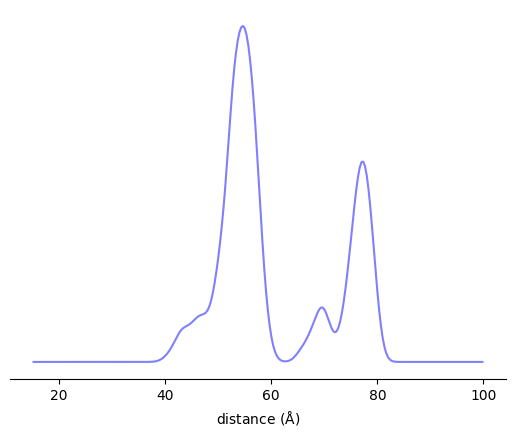

In [6]:
fig, ax = plt.subplots()
ax.plot(r, P)
ax.set_xlabel(r'distance ($\rm\AA$)')
ax.set_yticks([])
for spine in ax.spines:
    if spine=='bottom':
        continue
    ax.spines[spine].set_visible(False)

plt.show()
xl.save(*labels, prot)